In [62]:
import geopandas as gpd
import pandas as pd
import rasterio
import rasterio.plot
import matplotlib
import matplotlib.pyplot as plt
from tqdm.contrib.concurrent import thread_map, process_map # Parallel operations
from glob import glob
from tqdm.auto import tqdm
tqdm.pandas()

files = pd.Series(glob("training_tiles/LDS/**/*.geojson", recursive=True))
files

0       training_tiles/LDS/WestCoast/Sandy_MaoriBeach/...
1       training_tiles/LDS/WestCoast/Sandy_MaoriBeach/...
2       training_tiles/LDS/WestCoast/Sandy_MaoriBeach/...
3       training_tiles/LDS/WestCoast/Sandy_MaoriBeach/...
4       training_tiles/LDS/WestCoast/Sandy_MaoriBeach/...
                              ...                        
3517    training_tiles/LDS/WestCoast/JacksonBay_East/J...
3518    training_tiles/LDS/WestCoast/JacksonBay_East/J...
3519    training_tiles/LDS/WestCoast/JacksonBay_East/J...
3520    training_tiles/LDS/WestCoast/JacksonBay_East/J...
3521    training_tiles/LDS/WestCoast/JacksonBay_East/J...
Length: 3522, dtype: object

In [63]:
def check_file(filename):
    df = gpd.read_file(filename)
    if len(df):
        return len(df["class"].unique()) > 1
    else:
        return False

has_shoreline = thread_map(check_file, files)

100%|██████████| 3522/3522 [01:04<00:00, 54.27it/s] 


training_tiles/LDS/WestCoast/MikonuiRiver/MikonuiRiver_27FEB2017_WST16R/MikonuiRiver_27FEB2017_WST16R_1428119_5262169.geojson


(5261929.252437206, 5262169.252437206)

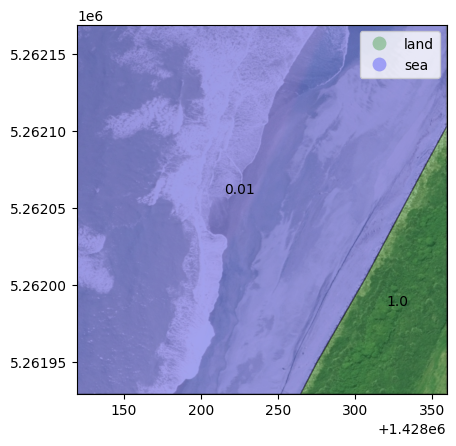

In [71]:
sample_filename = files[has_shoreline].sample(1).iloc[0]
print(sample_filename)
image = rasterio.open(sample_filename.replace(".geojson", ".tif"))
df = gpd.read_file(sample_filename)

# Plot the results, and check it all looks ok
fig, ax = plt.subplots()
ax = rasterio.plot.show(image, ax=ax)

cmap = matplotlib.colors.ListedColormap(['green', 'blue'])
df.plot(ax=ax, alpha=.3, column='class', cmap=cmap, categorical=True, legend=True, edgecolor='black')
df.apply(lambda x: ax.annotate(text=round(x.fraction_inland, 2), xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

b = df.total_bounds
xlim = ([b[0], b[2]])
ylim = ([b[1], b[3]])
ax.set_xlim(xlim)
ax.set_ylim(ylim)